# Machine Learning and Artificial Intelligence Research:  
### Random Forest Classification

## Table of contents (click to skip to the section)
* [Introduction](#introduction_rf)
  * [Background / Problem](#background_problem_rf)
    * [Advantages and Disadvantages of Random Forest Models](#procon_rf)
* [Data](#data_rf)
  * [Import the Data](#pulldata_rf)
  * [Exploration (Missing Values, Data Dispersion, Data Types)](#evaluate_rf) 
    * [Plot Data](#plot_rf)     
    * [Data Definitions](#data_defn_rf)     
    * [Correlation Matrix](#corr_matrix_rf) 
    * [Review Dataset Balance](#data_balance_rf)     
  * [Data Processing and Preparation](#dataprep_rf)
    * [Set X and Target y](#x_and_target_rf)
    * [Scale / Normalize (for continuous features)](#normalize_rf)
    * [Set Train / Test Splits](#train_test_rf)
* [Methodology - Supervised Learning: Classification](#method_class_rf)
  * [Random Forest](#randomforest_rf)
    * [Modeling - Random Forest](#modelingRF_rf)
    * [Accuracy and Important Features - Random Forest](#accuracy_features_rf)
* [Conclusion](#conclusion_arima)

## Introduction <a name="introduction_rf"></a>

### Background / Problem <a name="background_problem"></a>

Random forests

#### Random Forest Models - Pros and Cons<a name="procon_rf"></a>
Advantages of Random Forest models:
* Random forests are considered to be a highly accurate and robust method because of the multitudes of decision trees involved.
* It does not suffer from the overfitting problem due to it's voting system takes the average of all the predictions, canceling out the biases.
* The algorithm can be used in both classification and regression problems.
* Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
* It can determine the relative feature importance, which is helpful in prioritizing the most useful features for the classifier.

Disadvantages of Random Forest models:
* Random forests are time-consuming due to the vast number of decision trees used for the voting process, and all trees in the forest have to make a prediction.
* It's more difficult to interpret when compared to a decision tree, where one can easily follow the path.

Inspiration comes from the following article:
 * https://www.freecodecamp.org/news/how-to-use-the-tree-based-algorithm-for-machine-learning/

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web 
import datetime

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data <a name="data_rf"></a>

### Import the Data <a name="pulldata_rf"></a>

In [31]:
dataset = pd.read_csv(r'https://raw.githubusercontent.com/Davisy/Random-Forest-classification-Tutorial/master/data/pima_indians_diabetes.csv')

In [32]:
dataset.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
dataset.to_csv(r'C:\Users\jboyce\Desktop\programming stuff\pima_indians_diabetes.csv')

### Exploration (Missing Values, Data Dispersion, Data Types) <a name="evaluate_rf"></a>

In [34]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time_pregnant_no            768 non-null    int64  
 1   plasma_concentration        768 non-null    int64  
 2   diastolic_blood_pressure    768 non-null    int64  
 3   triceps_skinfold_thickness  768 non-null    int64  
 4   serum_insulin               768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree           768 non-null    float64
 7   age                         768 non-null    int64  
 8   class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [35]:
dataset.describe()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
dataset.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

### Data Definitions <a name="data_defn_rf"></a>

|	Column Name	|	Description	|
|	:--------	|	:--------	|
|	time_pregnant_no	|	Number of times pregnant	|
|	plasma_concentration	|	Plasma glucose concentration after 2 hours in an oral glucose tolerance test	|
|	diastolic_blood_pressure	|	Diastolic blood pressure (mm Hg)	|
|	triceps_skinfold_thickness	|	Triceps skinfold thickness (mm)	|
|	serum_insulin	|	2-hour serum insulin (mu U/ml)	|
|	bmi	|	Body mass index (weight in kg/(height in m)^2)	|
|	diabetes_pedigree	|	Diabetes pedigree function	|
|	age	|	Age (years)	|
|	class	|	Class / Target variable (binary 0 or 1)	|


### Correlation Matrix <a name="corr_matrix_rf"></a>

In [37]:
import seaborn as sns
corrmat = dataset.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(32,32)) # this figure was too small
plt.rcParams["figure.figsize"] = (16,11)
# plt.figure()

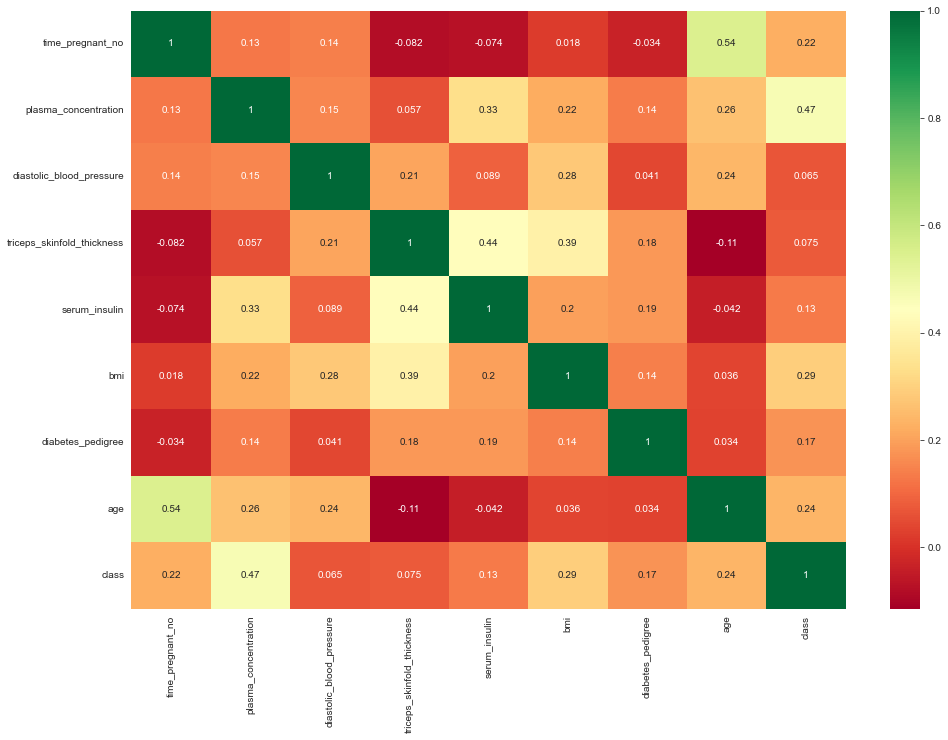

In [38]:
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

### Review Dataset Balance <a name="data_balance_heart"></a>

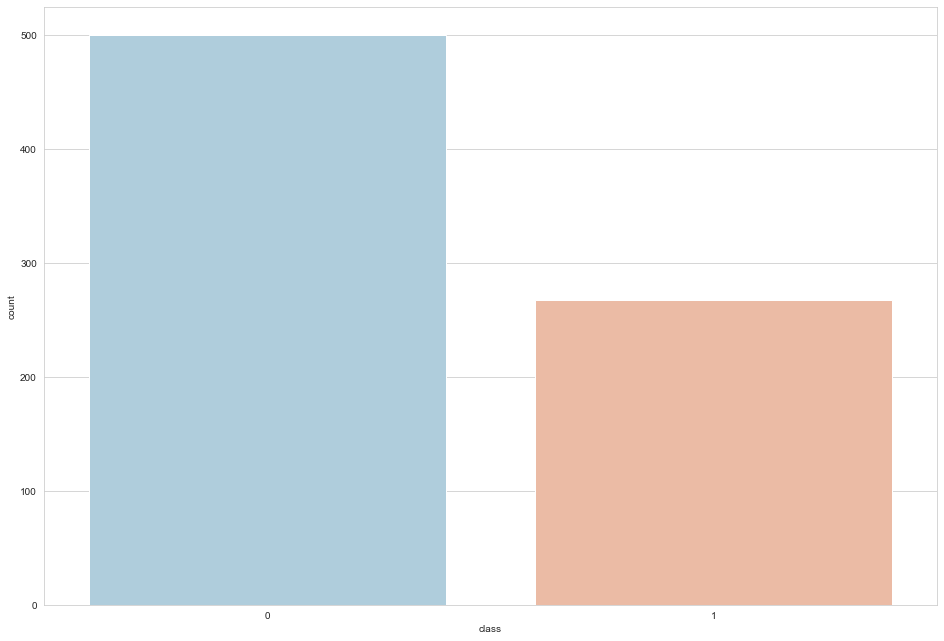

In [39]:
# Check allocation balancing  of target classes
sns.set_style('whitegrid')
sns.countplot(x='class',data=dataset,palette='RdBu_r')
plt.show()

One hot encoding its just applicable to categorical data, 
so there is no need to "normalize" what is already categorical. 
Although, the rest of your numerical data should be normalized.

## Data Processing and Preparation <a name="dataprep_rf"></a>

### Set X and Target y <a name="x_and_target_rf"></a>

In [41]:
y = dataset['class']
X = dataset.drop(['class'], axis = 1)
X_scaled = dataset.drop(['class'], axis = 1)
indices = X.index

### Scale / Normalize (for continuous features) <a name="normalize_rf"></a>

In [42]:
# normalize data (except onehot encoding)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['time_pregnant_no', 
                    'plasma_concentration',	
                    'diastolic_blood_pressure', 
                    'triceps_skinfold_thickness', 
                    'serum_insulin', 
                    'bmi', 
                    'diabetes_pedigree', 
                    'age']
X_scaled[columns_to_scale] = standardScaler.fit_transform(X_scaled[columns_to_scale])

### Set Train / Test Splits <a name="train_test_rf"></a>
Use a 70/30 train/test split

In [43]:
# est the train/test splits (70 / 30 train/test)
# using the list comprehensions created earlier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X_scaled, y, indices, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Train set (indices):', indices_train)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Test set (indices): ', indices_test)

Train set: (537, 8) (537,)
Train set (indices): Int64Index([262, 619, 275, 338, 177, 404, 467, 464, 247, 311,
            ...
            109,  58, 393, 456, 599, 360, 709, 439, 174, 122],
           dtype='int64', length=537)
Test set: (231, 8) (231,)
Test set (indices):  Int64Index([390, 146, 136, 420, 328,  72, 110, 254, 215, 559,
            ...
            263, 178, 299, 225, 175, 647, 216, 730, 682, 347],
           dtype='int64', length=231)


## Methodology - Supervised Learning: Classification <a name="method_class_rf"></a>

### Random Forest <a name="randomforest_rf"></a>

#### Modeling - Random Forest <a name="modelingRF_rf"></a>

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
# maybe show all the default values

#### Accuracy and Important Features - Random Forest <a name="accuracy_features_rf"></a>

In [45]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [73]:
# Calculate Model Accuracy
accuracy_randomforest_0 = round(accuracy_score(y_test, y_pred),6)
print(f"Accuracy: {accuracy_randomforest_0}")

Accuracy: 0.774892


#### Plot Feature Importance - Random Forest <a name="accuracy_features_rf"></a>

In [48]:
# check Important features
df_feature_importances = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
df_feature_importances

,feature,importance
1,plasma_concentration,0.236099
5,bmi,0.155883
7,age,0.151127
6,diabetes_pedigree,0.122915
2,diastolic_blood_pressure,0.092482
0,time_pregnant_no,0.090331
4,serum_insulin,0.076164
3,triceps_skinfold_thickness,0.074999


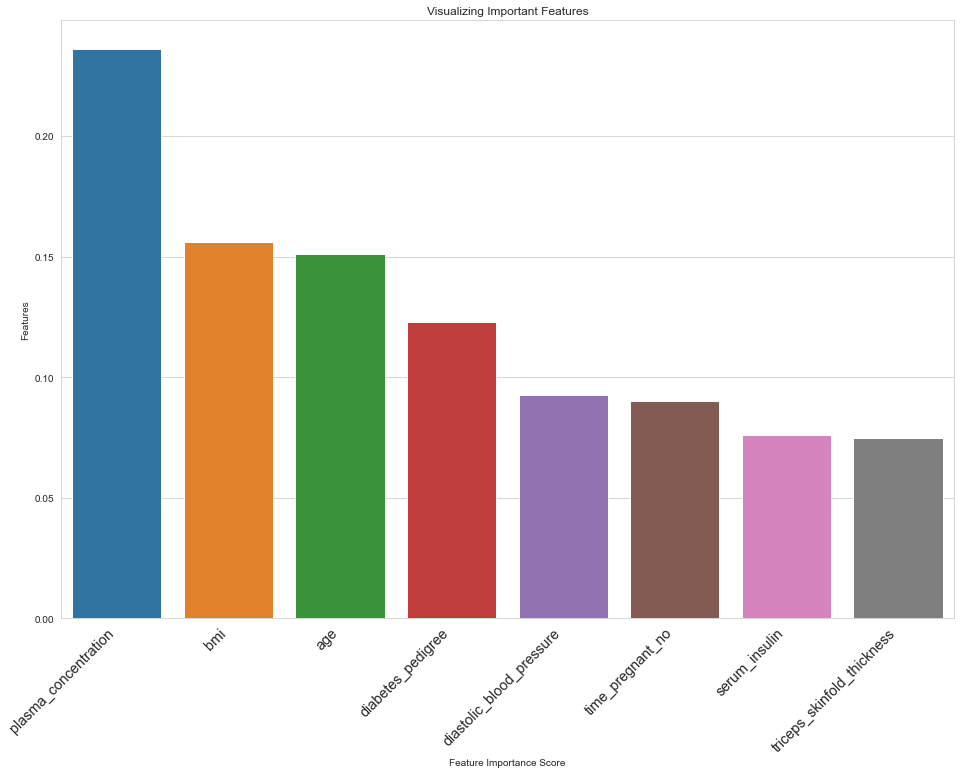

In [49]:
# visualize important features

# Creating a bar plot
sns.barplot(x=df_feature_importances.feature, y=df_feature_importances.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [59]:
lowest_rank = df_feature_importances.loc[df_feature_importances.index == df_feature_importances.importance.idxmin()].feature.values
print(f"Note that the lowest ranked feature is {lowest_rank[0]}.\nLet's remove this feature and see how much accuracy improves.")

Note that the lowest ranked feature is triceps_skinfold_thickness.
Let's remove this feature and see how much accuracy improves.


In [69]:
# load data with selected features
X1 = dataset.drop(["class", "triceps_skinfold_thickness"], axis=1)
y1 = dataset["class"]

# standardize the dataset
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# split into train and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_scaled, y1, stratify=y1, test_size=0.30, random_state=4
)

In [70]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X1_train, y1_train)

# prediction on test set
y1_pred = clf.predict(X1_test)

In [72]:
# Calculate Model Accuracy,
accuracy_randomforest_1 = round(accuracy_score(y1_test, y1_pred),6)
print(f"Accuracy: {accuracy_randomforest_1}")

Accuracy: 0.709957


## Conclusion<a name="conclusion_arima"></a>

Random forests are a useful supervised learning classification tool that helps limit overfitting. We could further improve model accuracy by removing least important features as part of PCA and attempt to tune parameters to optimize model results.